# EDA and Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

filepath = '/content/drive/MyDrive/M4AI/ods.csv'
df = pd.read_csv(filepath)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

In [ ]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Value counts for categorical columns (adjust the threshold as needed)
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(f"\nValue counts for column: {col}")
        print(df[col].value_counts())



Value counts for column: Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Value counts for column: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Value counts for column: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

Value counts for column: CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Value counts for column: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Value counts for column: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64

Value counts for column: CALC
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Value counts for column: MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Value counts fo

In [ ]:
df = df.rename(columns={'family_history_with_overweight': 'FHOO'})
df.head()

,Gender,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# prompt: encode gender to 1 and 0

# Map 'gender' column to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['FHOO'] = df['FHOO'].map({'no': 0, 'yes': 1})
df['FAVC'] = df['FAVC'].map({'no': 0, 'yes': 1})
df['CAEC'] = df['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['SMOKE'] = df['SMOKE'].map({'no': 0, 'yes': 1})
df['SCC'] = df['SCC'].map({'no': 0, 'yes': 1})
df['CALC'] = df['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['MTRANS'] = df['MTRANS'].map({'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4})
df['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})

df.head()

,Gender,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


In [ ]:
df.describe()

,Gender,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,0.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
attribute_lookup = {
    "Gender": "Gender of the individual (Male/Female)",
    "Age": "Age of the individual (in years)",
    "Height": "Height of the individual (in meters)",
    "Weight": "Weight of the individual (in kilograms)",
    "FHOO": "History of being overweight in the family (yes/no)",
    "FAVC": "Frequent consumption of high-calorie foods (yes/no)",
    "FCVC": "Frequency of vegetable consumption (1: low, 2: moderate, 3: high)",
    "NCP": "Number of main meals consumed per day",
    "CAEC": "Consumption of food between meals (no, Sometimes, Frequently, Always)",
    "SMOKE": "Smoking habit (yes/no)",
    "CH2O": "Daily water intake (Liters: 0: low, 1: moderate, 2: high)",
    "SCC": "Calories consumption monitoring (yes/no)",
    "FAF": "Physical activity frequency (hours per week)",
    "TUE": "Time spent using technological devices (hours per day)",
    "CALC": "Consumption of alcohol (no, Sometimes, Frequently, Always)",
    "MTRANS": "Mode of transportation (Automobile, Motorbike, Bike, Public_Transportation, Walking)",
    "NObeyesdad": "Obesity level (Target variable: Insufficient_Weight, Normal_Weight, Overweight_Level_I/II, Obesity_Type_I/II/III)"
}

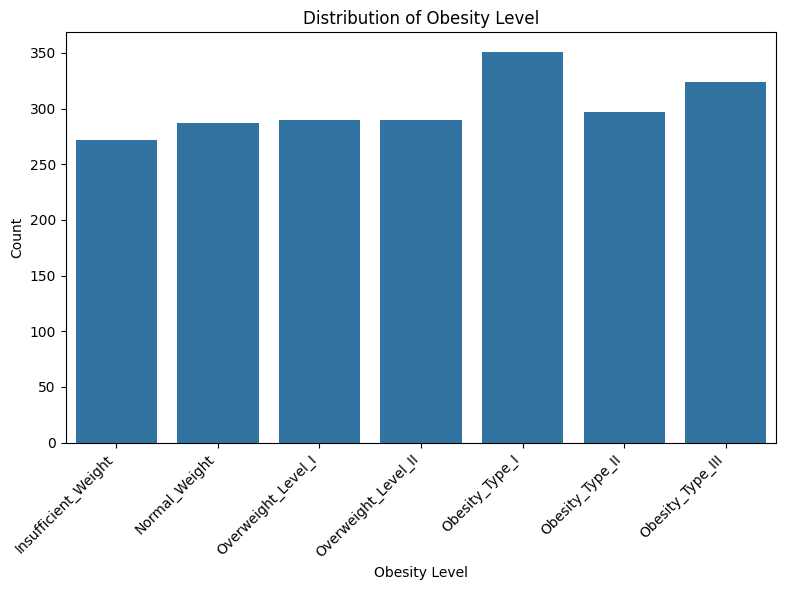

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Count')

# Define labels for obesity levels
obesity_labels = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

# Set the x-axis tick labels
plt.xticks(list(obesity_labels.keys()), list(obesity_labels.values()), rotation=45, ha='right')

plt.tight_layout()
plt.show()

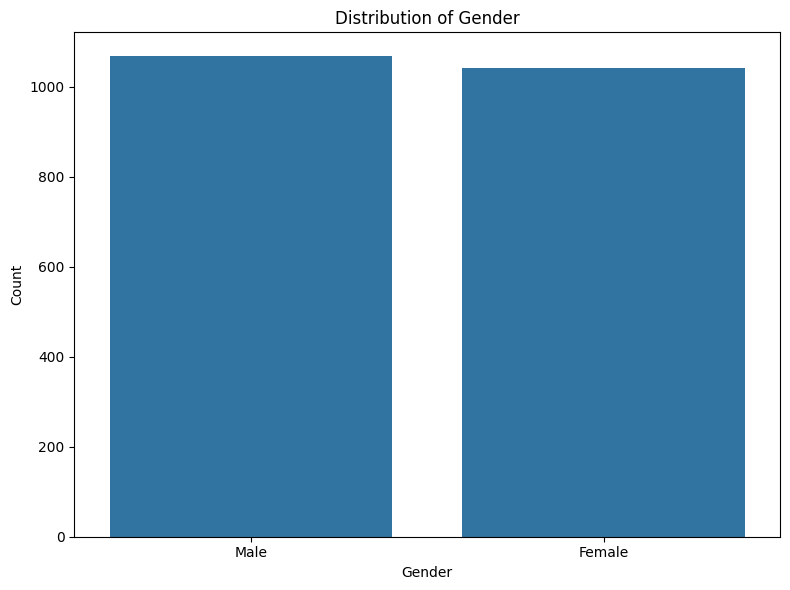

In [ ]:
# prompt: distribution of gender

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Define labels for gender
gender_labels = {
    0: 'Male',
    1: 'Female',
}

# Set the x-axis tick labels
plt.xticks(list(gender_labels.keys()), list(gender_labels.values()), rotation=0)

plt.tight_layout()
plt.show()

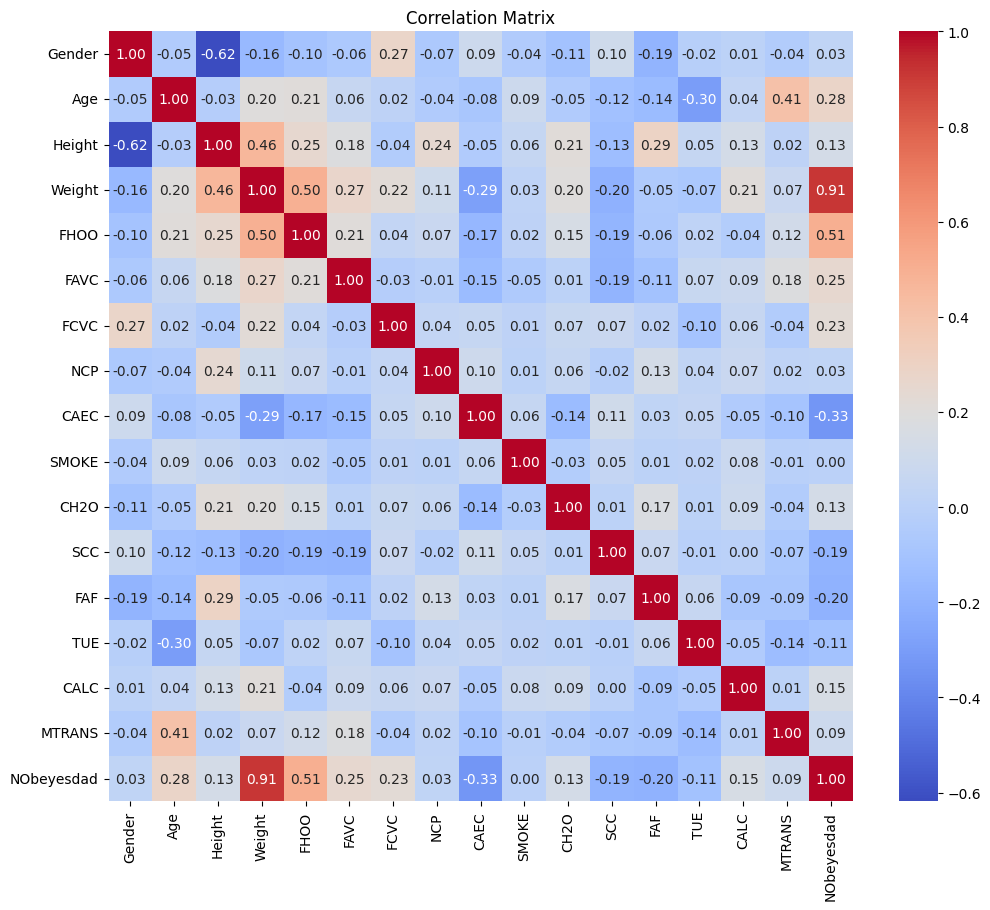

In [ ]:
if not df.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

In [ ]:
df['BMI'] = df['Weight'] / (df['Height']**2)

df.head()

,Gender,Age,Height,Weight,FHOO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1,24.386526
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3,28.342381


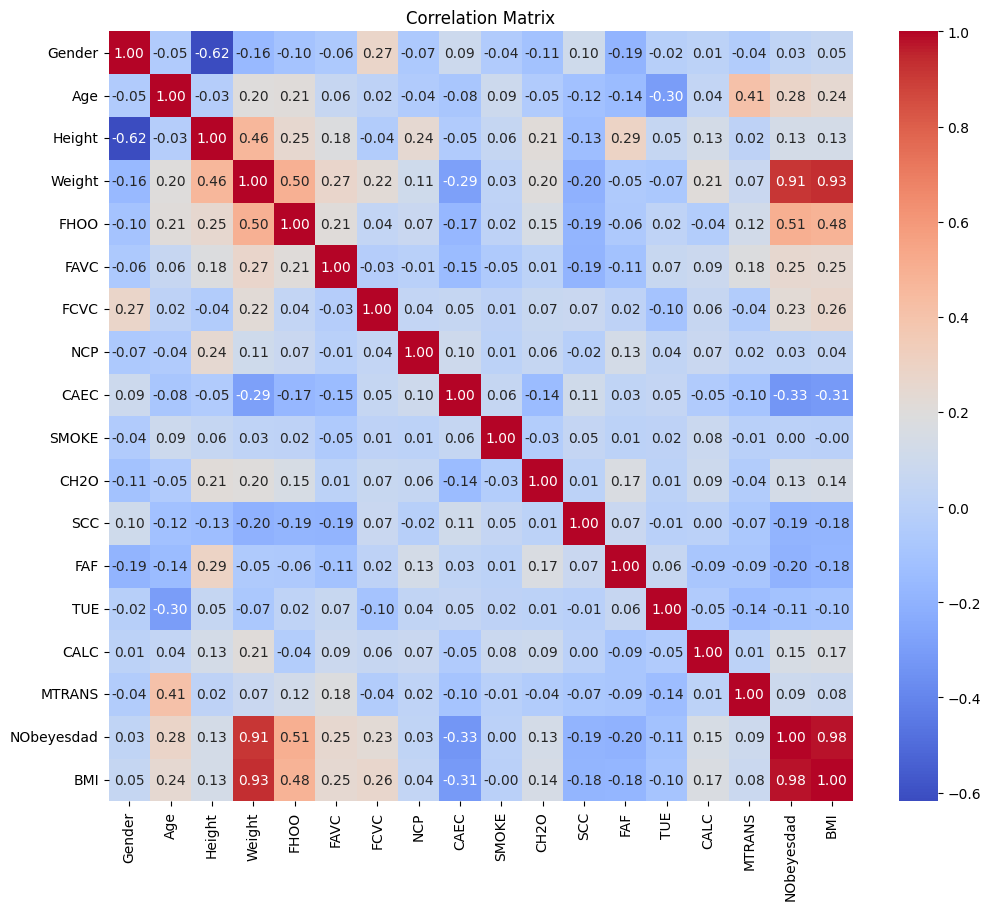

In [ ]:
if not df.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

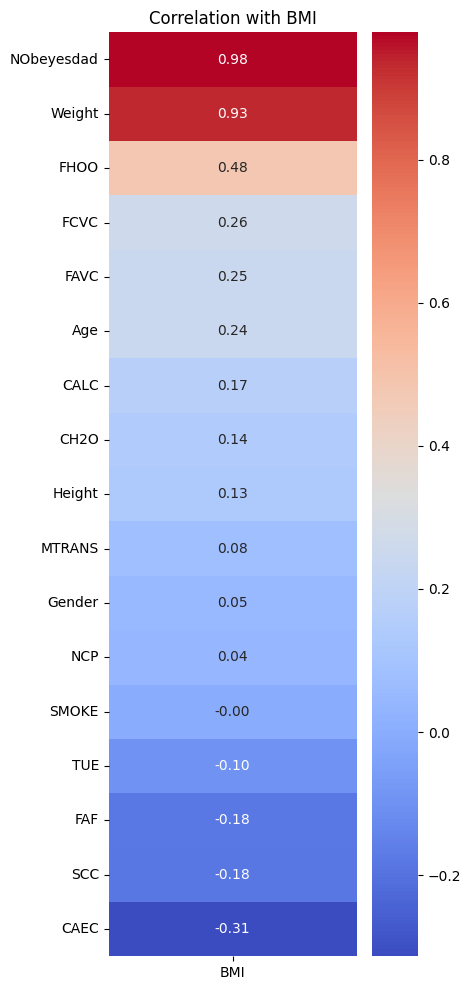

In [ ]:
if 'BMI' in df.columns and not df.empty:
    plt.figure(figsize=(4, 12))
    correlation_with_bmi = df.corr()['BMI'].drop('BMI').sort_values(ascending=False)
    sns.heatmap(correlation_with_bmi.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation with BMI')
    plt.show()

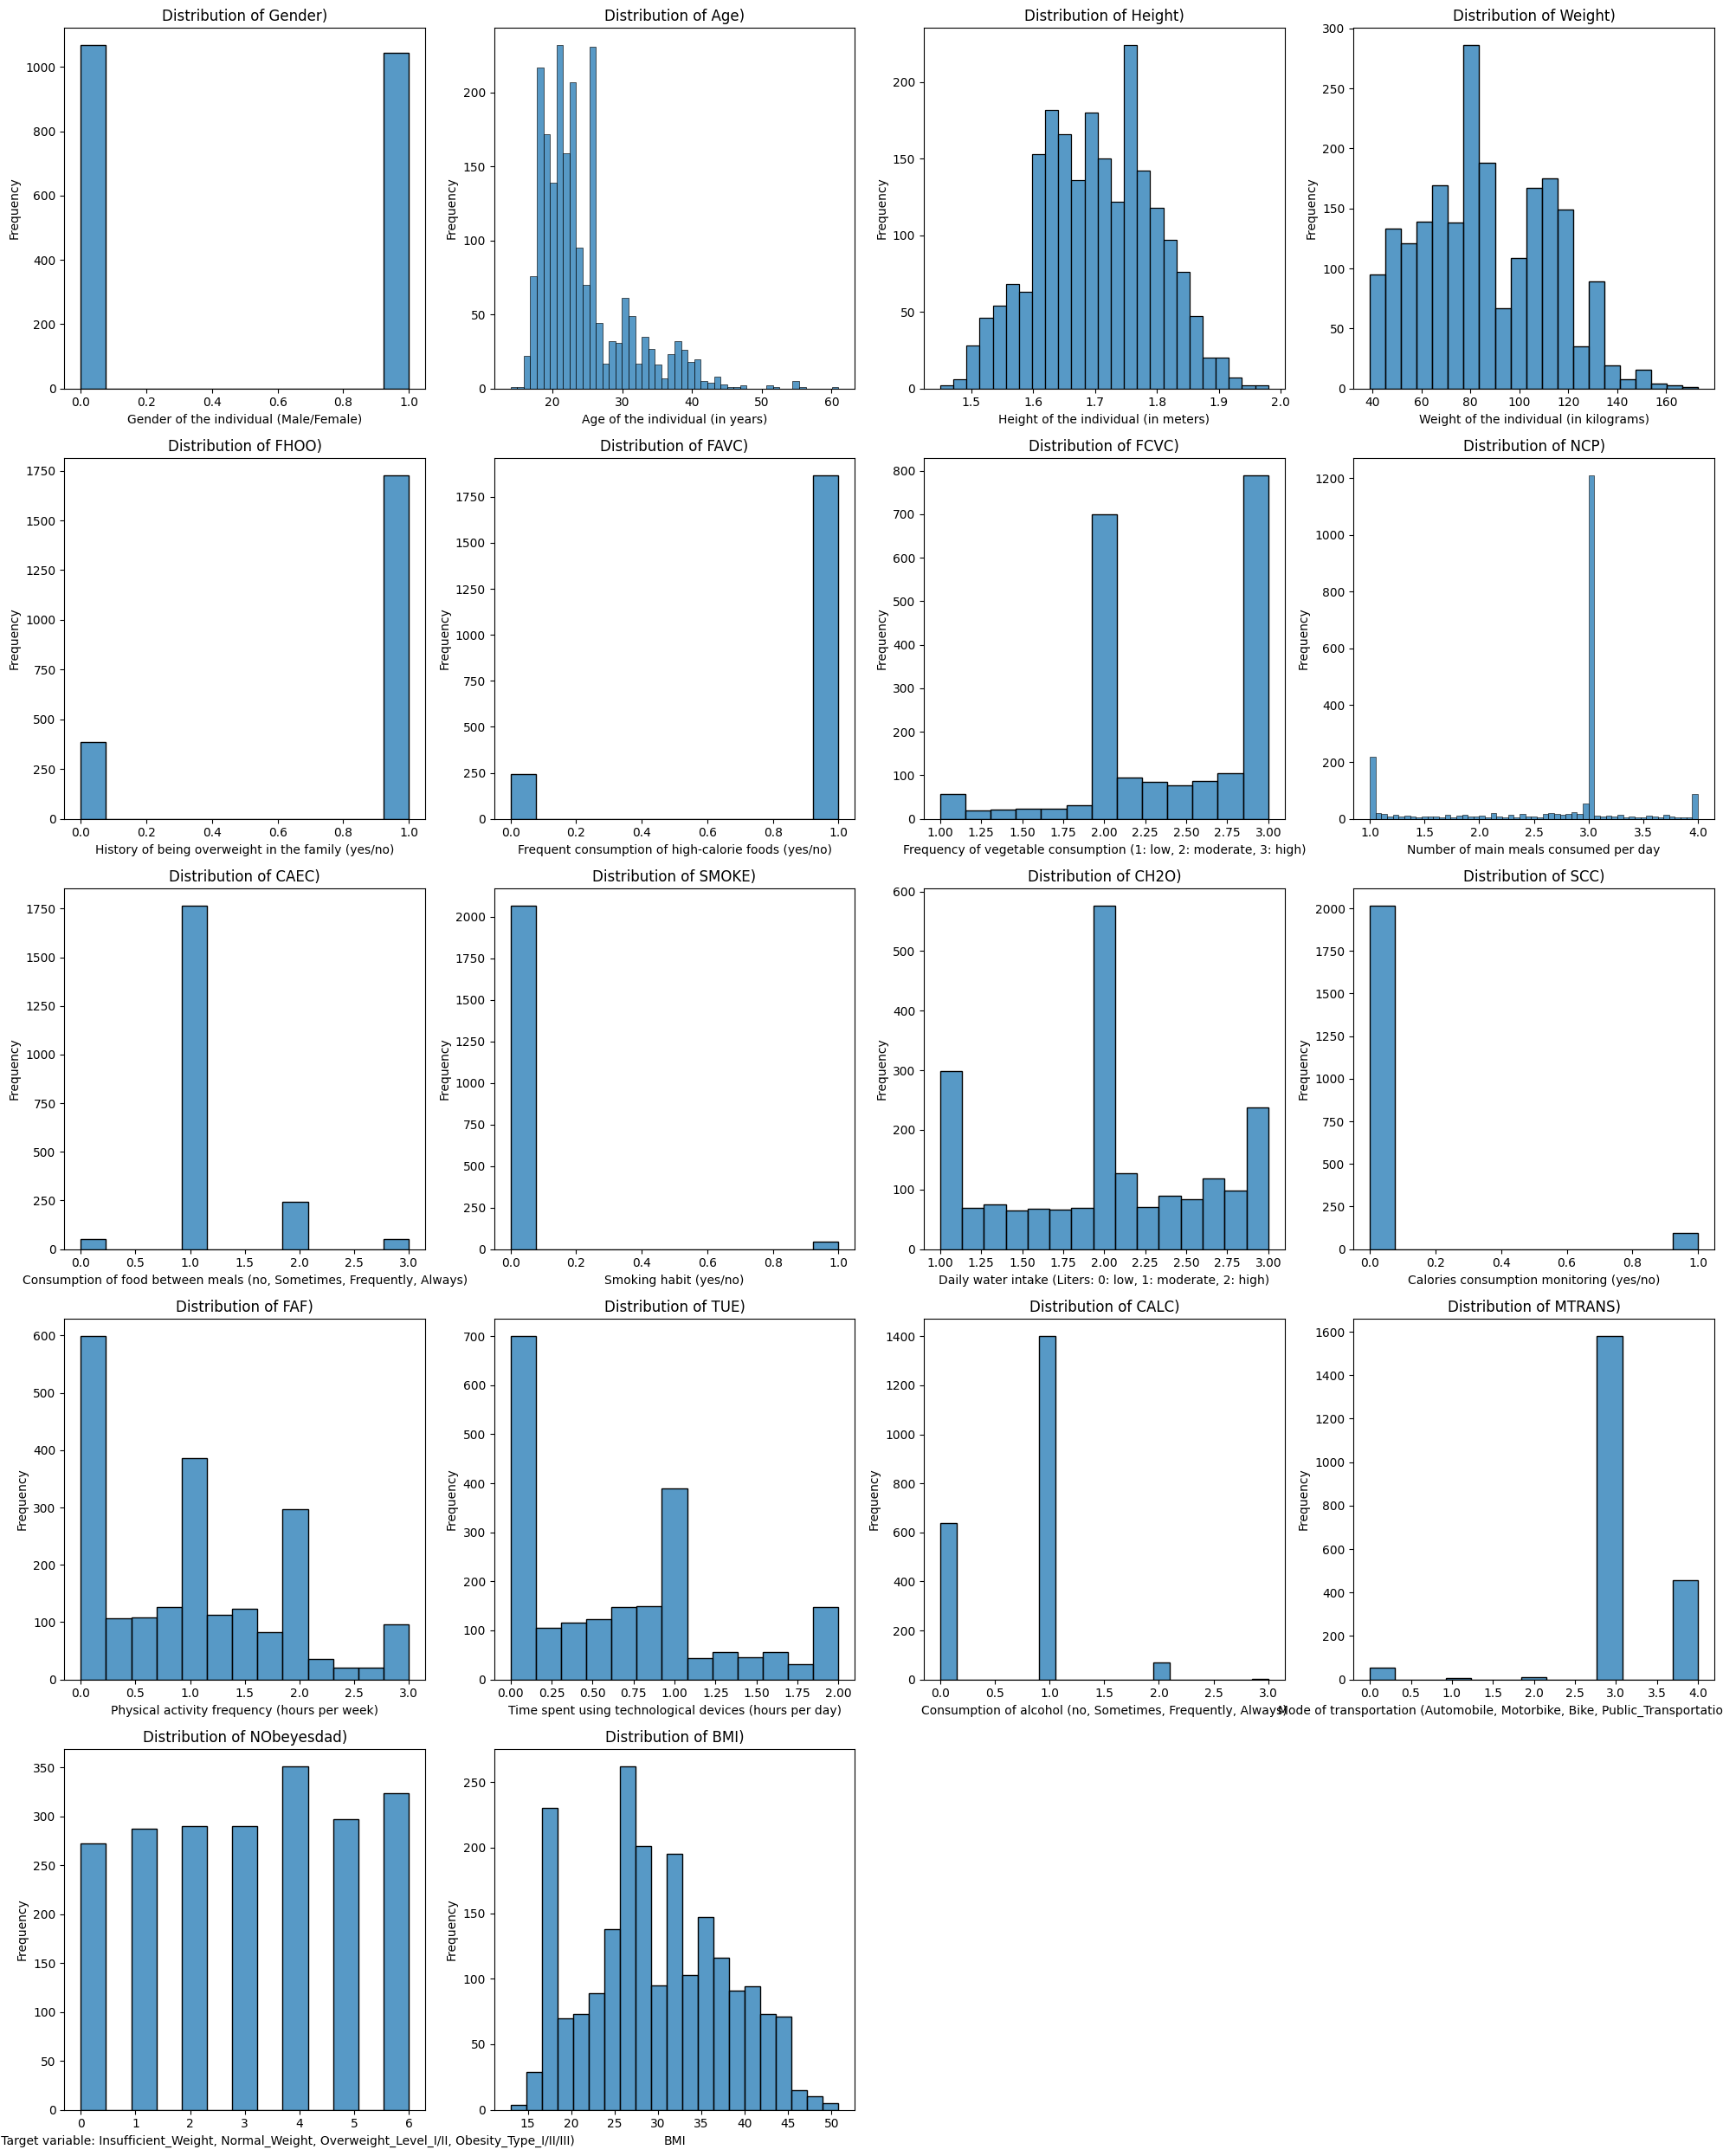

In [ ]:
# Calculate the number of rows needed for the subplot grid
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 4 # Use integer division to get the number of rows needed

plt.figure(figsize=(20, n_rows * 5)) # Adjust figure size based on number of rows

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, 4, i + 1)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col})')
    if col in attribute_lookup:
      plt.xlabel(attribute_lookup[col])
    else:
      plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

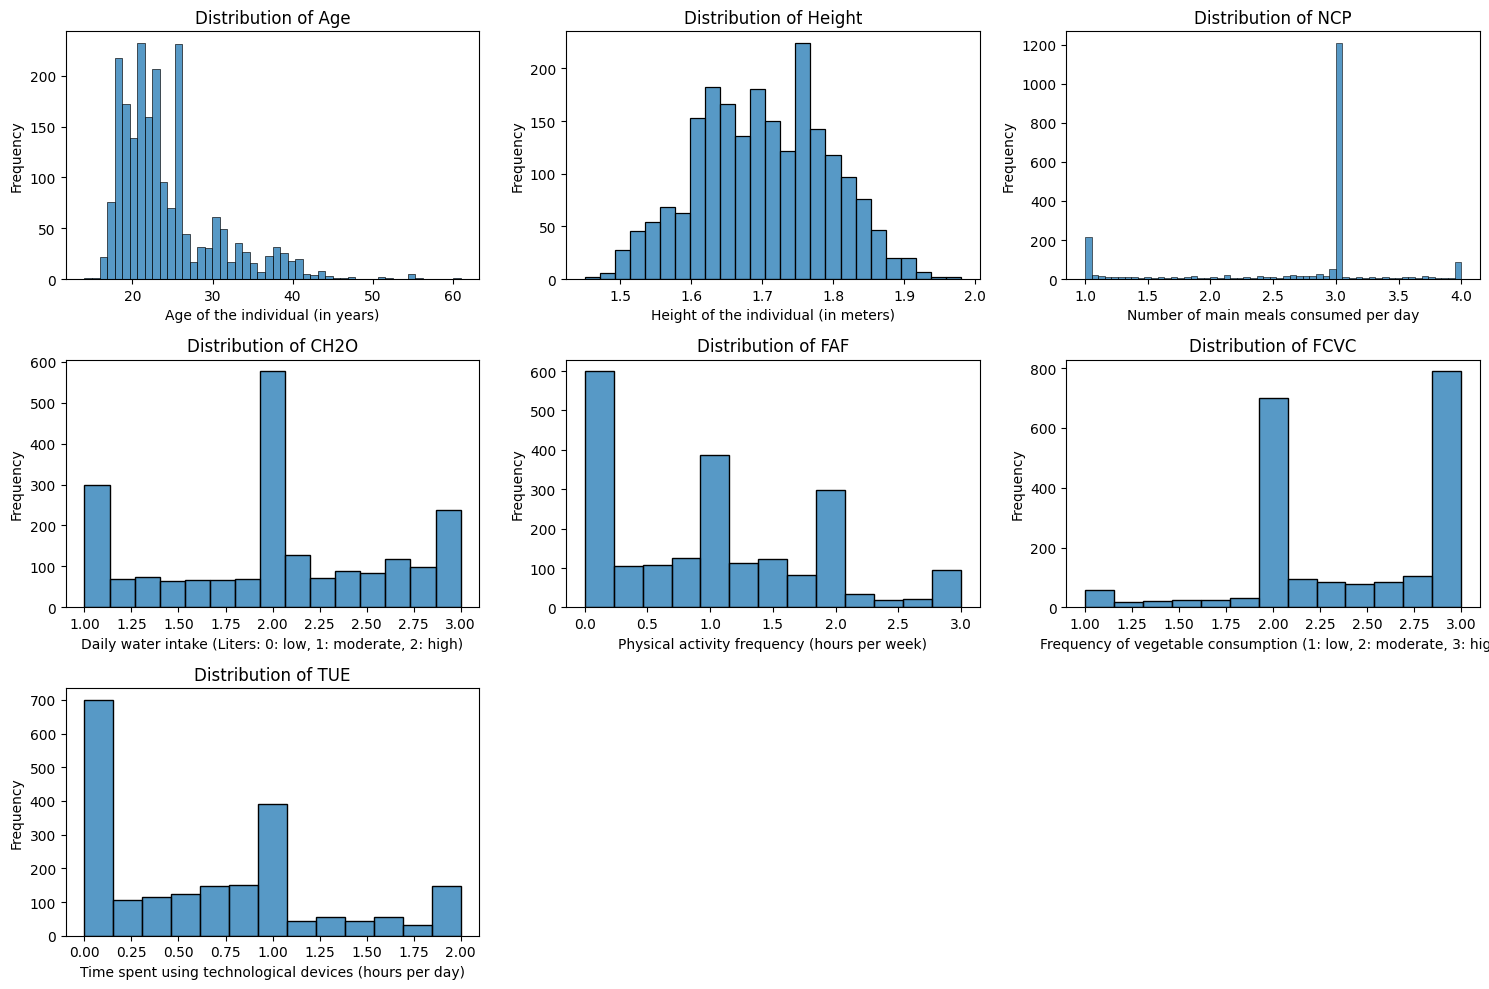

In [ ]:
# prompt: histogram of age height NCP,CH2O, FAF, use attribute look up to label them

features_to_histogram = ['Age', 'Height', 'NCP', 'CH2O', 'FAF', 'FCVC', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_histogram):
    plt.subplot(3, 3, i + 1) # Adjust the grid size as needed
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(attribute_lookup[col])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

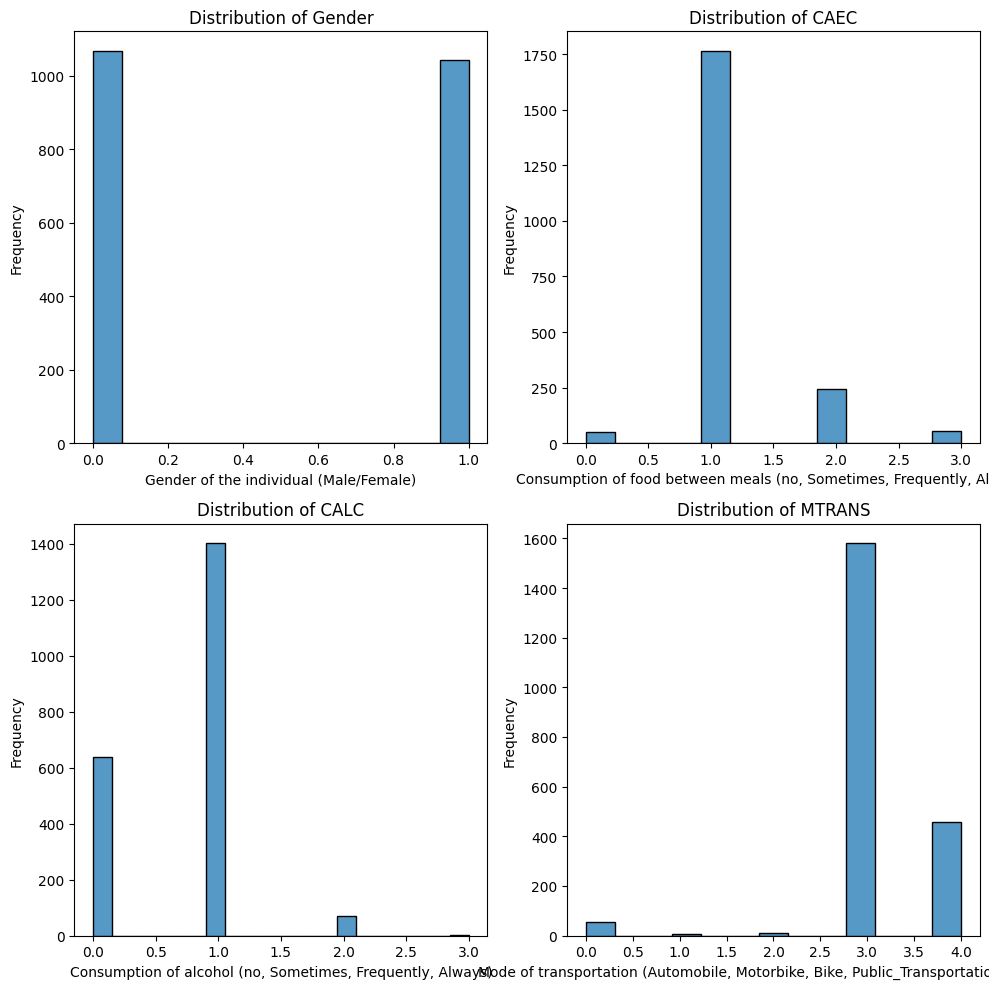

In [ ]:
# prompt: histogram of age height NCP,CH2O, FAF, use attribute look up to label them

features_to_histogram = ['Gender', 'CAEC', 'CALC', 'MTRANS']

plt.figure(figsize=(10, 10))
for i, col in enumerate(features_to_histogram):
    plt.subplot(2, 2, i + 1) # Adjust the grid size as needed
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(attribute_lookup[col])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

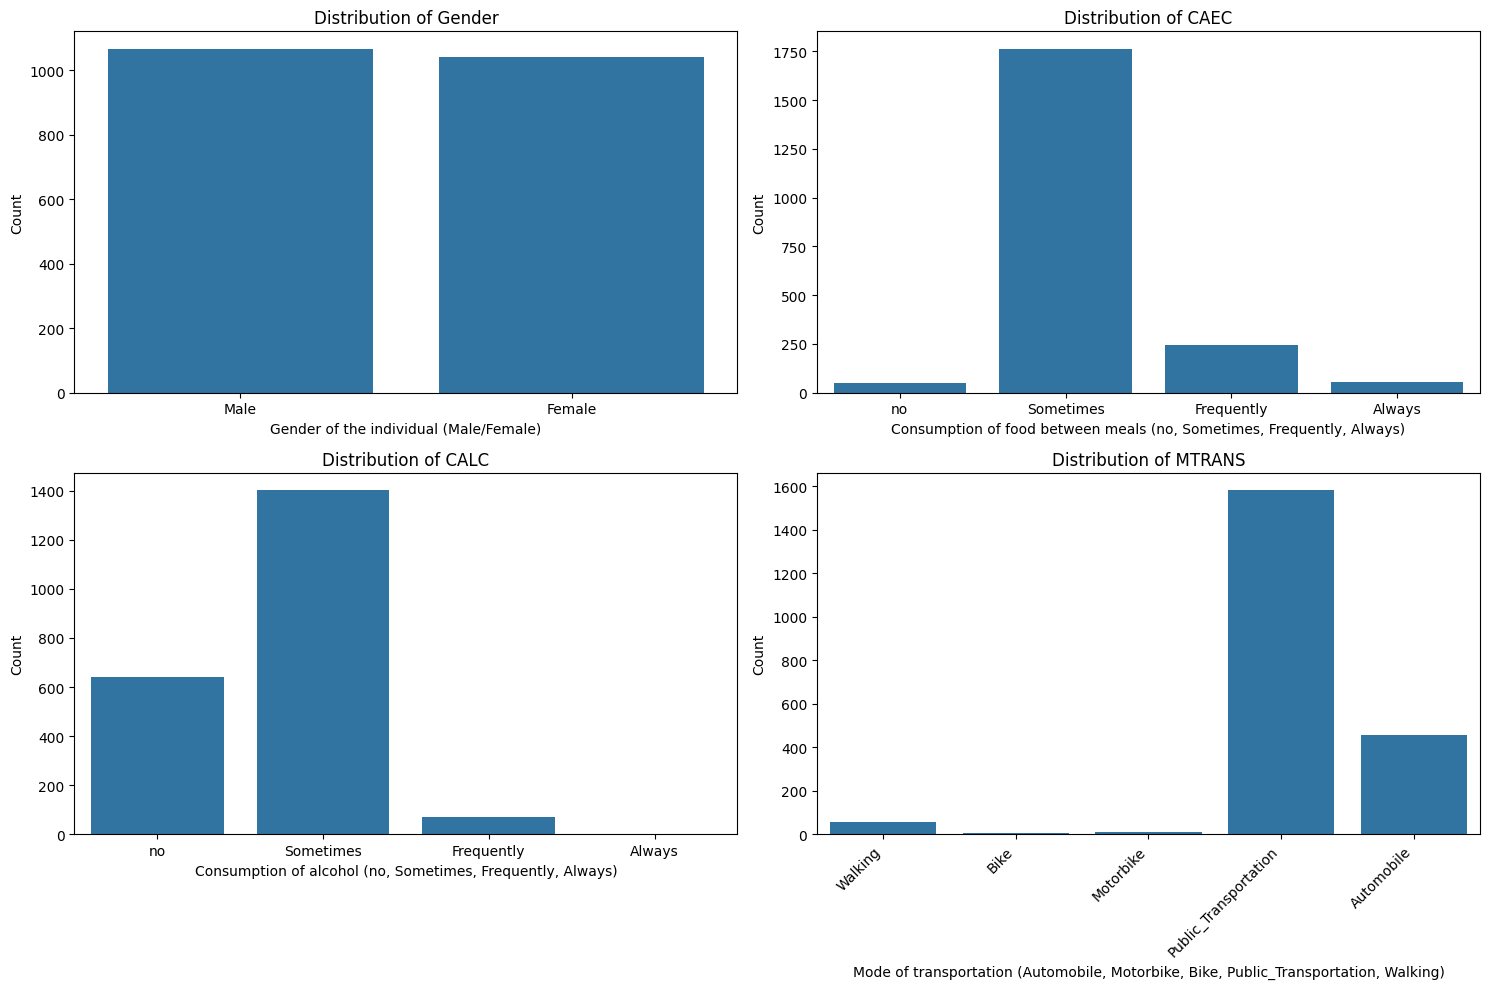

In [ ]:
# prompt: make a distribution chart with 'Gender', 'CAEC', 'CALC', 'MTRANS'

features_to_count = ['Gender', 'CAEC', 'CALC', 'MTRANS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_count):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    if col in attribute_lookup:
        plt.xlabel(attribute_lookup[col])
    else:
        plt.xlabel(col)
    plt.ylabel('Count')

    # Add specific labels if needed for the categorical features
    if col == 'Gender':
        plt.xticks(list(gender_labels.keys()), list(gender_labels.values()), rotation=0)
    elif col == 'CAEC':
         caec_labels = {
             0: 'no',
             1: 'Sometimes',
             2: 'Frequently',
             3: 'Always'
         }
         plt.xticks(list(caec_labels.keys()), list(caec_labels.values()), rotation=0)
    elif col == 'CALC':
        calc_labels = {
            0: 'no',
            1: 'Sometimes',
            2: 'Frequently',
            3: 'Always'
        }
        plt.xticks(list(calc_labels.keys()), list(calc_labels.values()), rotation=0)
    elif col == 'MTRANS':
        mtrans_labels = {
            0: 'Walking',
            1: 'Bike',
            2: 'Motorbike',
            3: 'Public_Transportation',
            4: 'Automobile'
        }
        plt.xticks(list(mtrans_labels.keys()), list(mtrans_labels.values()), rotation=45, ha='right')


plt.tight_layout()
plt.show()

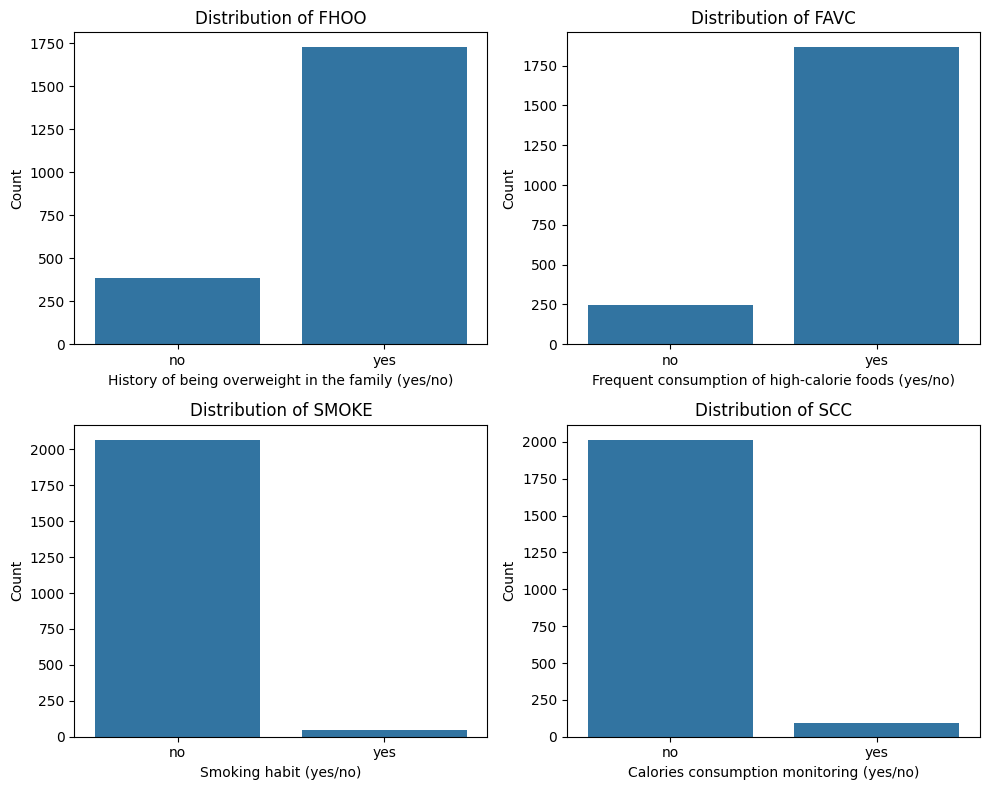

In [ ]:
# prompt: histogram of FHOO, FAVC, SMOKE, SCC,

features_to_count = ['FHOO', 'FAVC', 'SMOKE', 'SCC']

plt.figure(figsize=(10, 8))
for i, col in enumerate(features_to_count):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    if col in attribute_lookup:
        plt.xlabel(attribute_lookup[col])
    else:
        plt.xlabel(col)
    plt.ylabel('Count')

    # Add specific labels for binary features
    if col in ['FHOO', 'FAVC', 'SMOKE', 'SCC']:
        binary_labels = {0: 'no', 1: 'yes'}
        plt.xticks(list(binary_labels.keys()), list(binary_labels.values()), rotation=0)

plt.tight_layout()
plt.show()


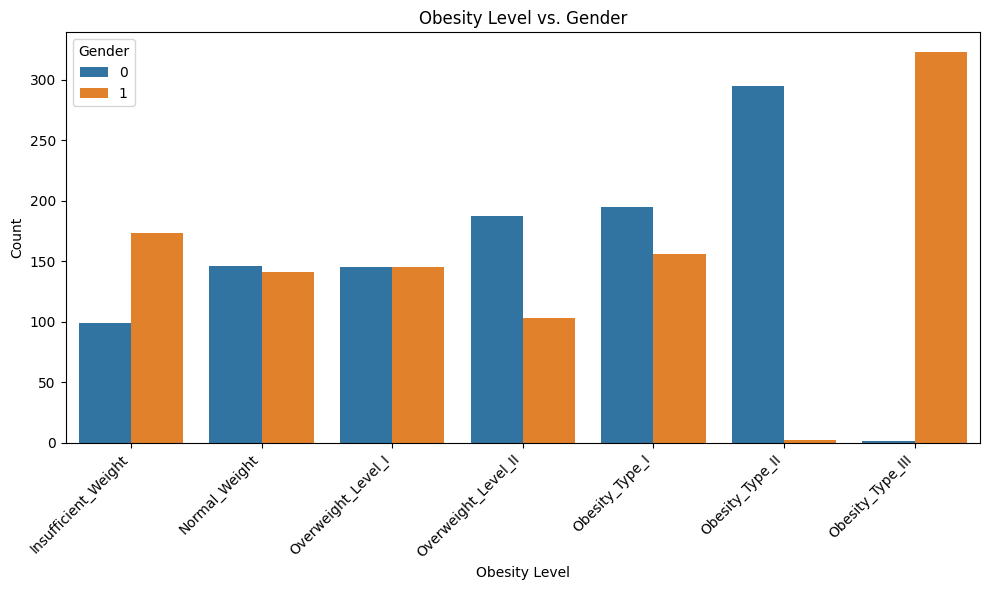

In [ ]:
# prompt: plot obesity level vs gender

plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='Gender', data=df)
plt.title('Obesity Level vs. Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Count')

# Set the x-axis tick labels
plt.xticks(list(obesity_labels.keys()), list(obesity_labels.values()), rotation=45, ha='right')

plt.tight_layout()
plt.show()

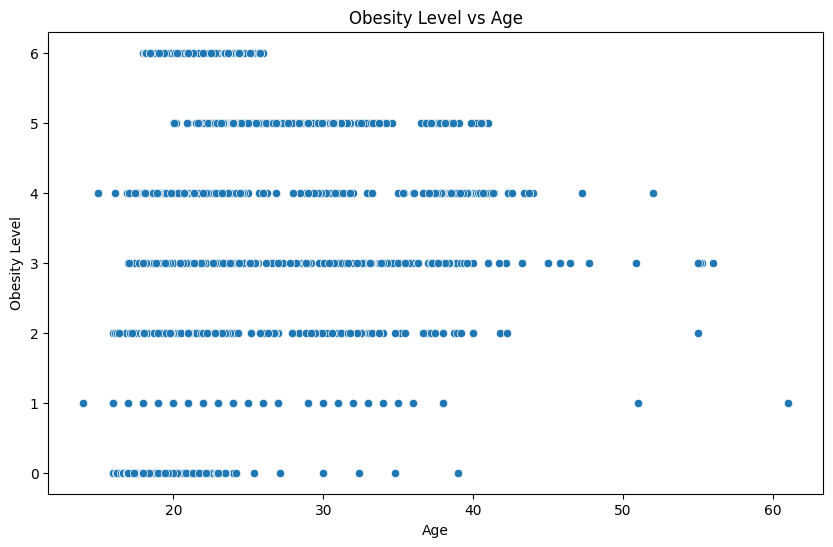

In [ ]:
# prompt: scatter obsesity level vs age

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='NObeyesdad', data=df)
plt.title('Obesity Level vs Age')
plt.xlabel('Age')
plt.ylabel('Obesity Level')
plt.show()

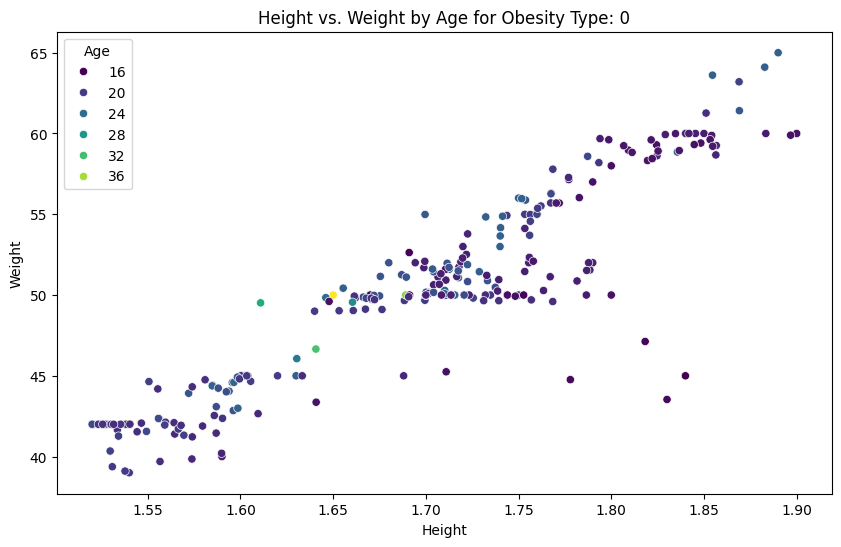

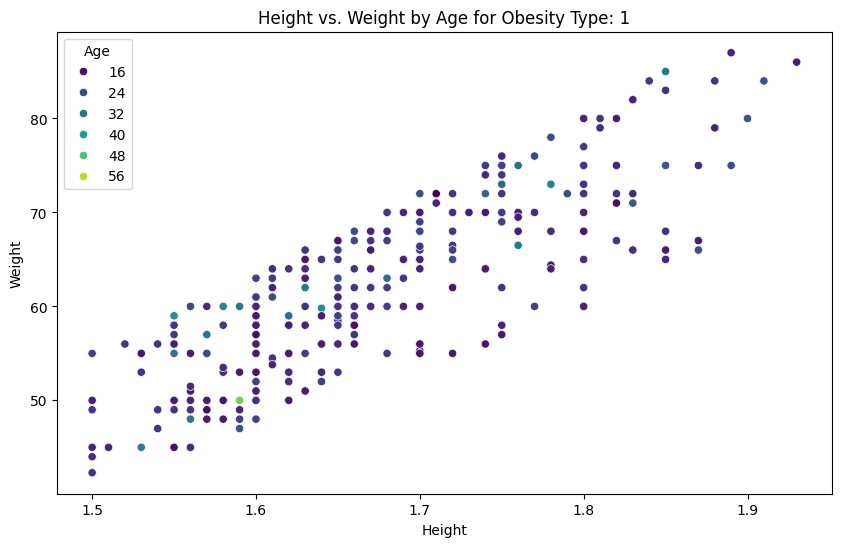

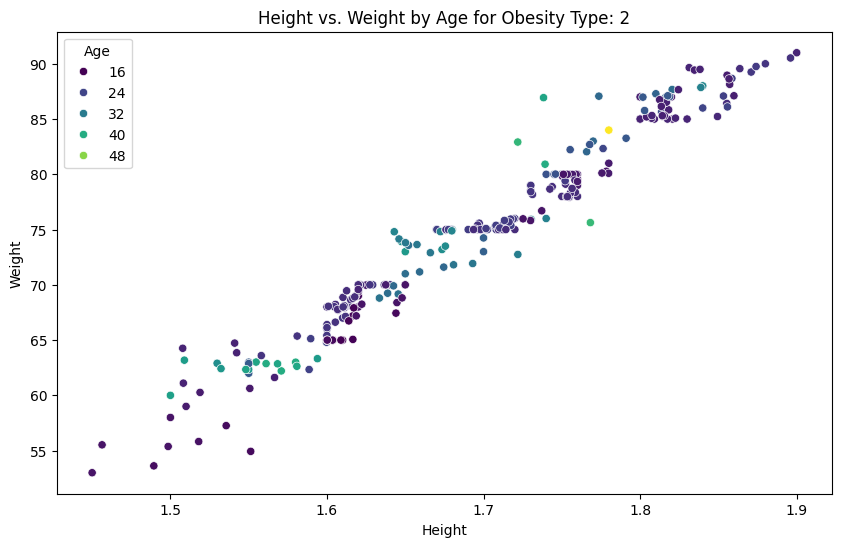

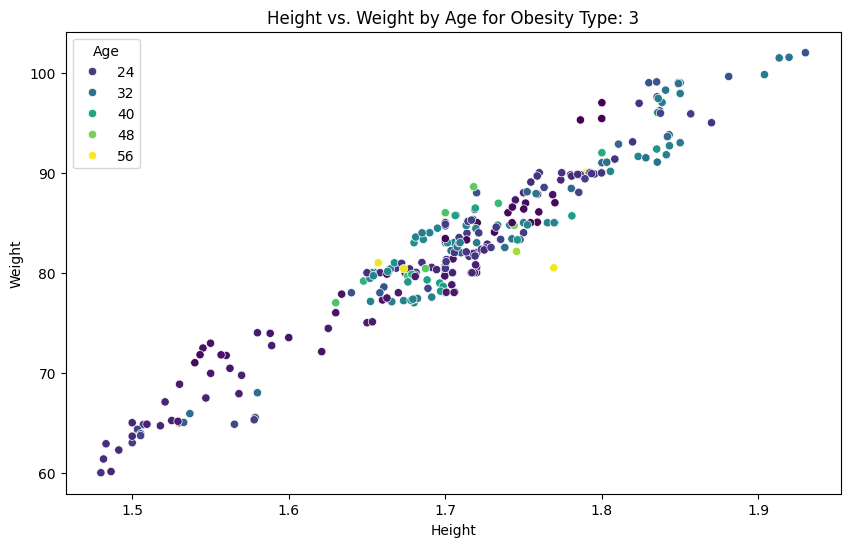

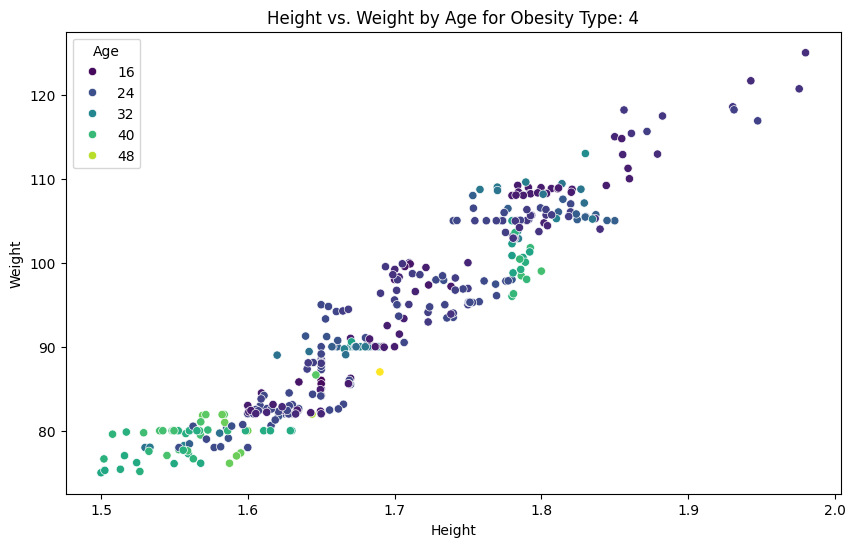

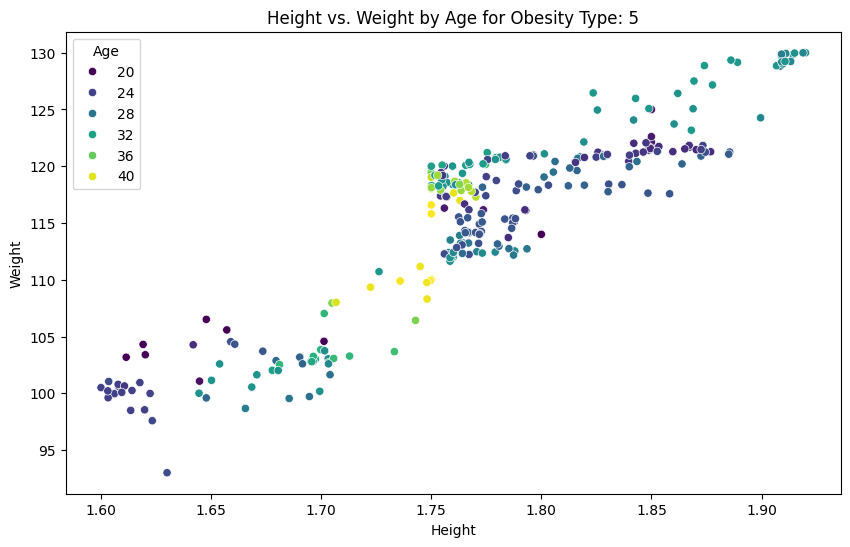

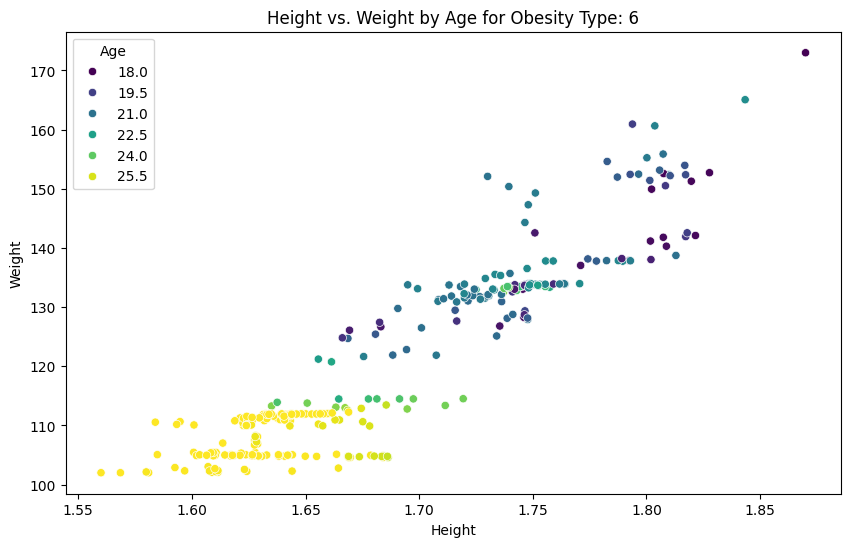

In [ ]:
# prompt: split the dataset into different obesity type and for each category, make a scatter plot of height vs weight color coded by age

# Get unique obesity types
obesity_types = df['NObeyesdad'].unique()
obesity_types.sort()
# Loop through each obesity type and create a scatter plot
for obesity_type in obesity_types:
    # Filter the DataFrame for the current obesity type
    df_filtered = df[df['NObeyesdad'] == obesity_type]
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Height', y='Weight', hue='Age', data=df_filtered, palette='viridis')
    plt.title(f'Height vs. Weight by Age for Obesity Type: {obesity_type}')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()

# Train and evaluate function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_and_evaluate_model(X_train, y_train, X_test, y_test, models):
    for name, model in models.items():
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Print the evaluation metrics
        print()
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (weighted): {precision:.4f}")
        print(f"Recall (weighted): {recall:.4f}")


# Train only using BMI

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['BMI']]
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1583, 1)
Shape of X_test: (528, 1)
Shape of y_train: (1583,)
Shape of y_test: (528,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'SVM': SVC(max_iter=5000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting':  GradientBoostingClassifier(random_state=42),
}

In [ ]:
# train_and_evaluate_model(X_train, y_train, X_test, y_test, models)


Model: KNN
Accuracy: 0.9413
Precision (weighted): 0.9427
Recall (weighted): 0.9413

Model: Naive Bayes
Accuracy: 0.9205
Precision (weighted): 0.9235
Recall (weighted): 0.9205

Model: Logistic Regression
Accuracy: 0.9280
Precision (weighted): 0.9283
Recall (weighted): 0.9280

Model: SVM
Accuracy: 0.9356
Precision (weighted): 0.9370
Recall (weighted): 0.9356

Model: Decision Tree
Accuracy: 0.9356
Precision (weighted): 0.9360
Recall (weighted): 0.9356

Model: Random Forest
Accuracy: 0.9356
Precision (weighted): 0.9360
Recall (weighted): 0.9356

Model: Gradient Boosting
Accuracy: 0.9356
Precision (weighted): 0.9360
Recall (weighted): 0.9356


# Train with everything

In [ ]:
feature_columns = df.columns.tolist()
feature_columns.remove('NObeyesdad')

X = df[feature_columns]
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1583, 17)
Shape of X_test: (528, 17)
Shape of y_train: (1583,)
Shape of y_test: (528,)


In [ ]:
# train_and_evaluate_model(X_train, y_train, X_test, y_test, models)


Model: KNN
Accuracy: 0.9432
Precision (weighted): 0.9456
Recall (weighted): 0.9432

Model: Naive Bayes
Accuracy: 0.8977
Precision (weighted): 0.9018
Recall (weighted): 0.8977

Model: Logistic Regression
Accuracy: 0.9583
Precision (weighted): 0.9606
Recall (weighted): 0.9583

Model: SVM
Accuracy: 0.7367
Precision (weighted): 0.7540
Recall (weighted): 0.7367

Model: Decision Tree
Accuracy: 0.9678
Precision (weighted): 0.9685
Recall (weighted): 0.9678

Model: Random Forest
Accuracy: 0.9886
Precision (weighted): 0.9887
Recall (weighted): 0.9886

Model: Gradient Boosting
Accuracy: 0.9697
Precision (weighted): 0.9709
Recall (weighted): 0.9697


# Proper training

In [ ]:
feature_columns.remove('Height')
feature_columns.remove('Weight')
feature_columns.remove('BMI')

X = df[feature_columns]
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1583, 14)
Shape of X_test: (528, 14)
Shape of y_train: (1583,)
Shape of y_test: (528,)


In [ ]:
# train_and_evaluate_model(X_train, y_train, X_test, y_test, models)


Model: KNN
Accuracy: 0.7633
Precision (weighted): 0.7556
Recall (weighted): 0.7633

Model: Naive Bayes
Accuracy: 0.5814
Precision (weighted): 0.6154
Recall (weighted): 0.5814

Model: Logistic Regression
Accuracy: 0.5890
Precision (weighted): 0.5774
Recall (weighted): 0.5890

Model: SVM
Accuracy: 0.4186
Precision (weighted): 0.4162
Recall (weighted): 0.4186

Model: Decision Tree
Accuracy: 0.7178
Precision (weighted): 0.7178
Recall (weighted): 0.7178

Model: Random Forest
Accuracy: 0.8466
Precision (weighted): 0.8516
Recall (weighted): 0.8466

Model: Gradient Boosting
Accuracy: 0.7803
Precision (weighted): 0.7808
Recall (weighted): 0.7803


In [ ]:
import torch
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network
class MultiClassModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer with 128 neurons
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer with 64 neurons
        self.fc3 = nn.Linear(64, num_classes)# Output layer for multi-class classification
        self.dropout = nn.Dropout(0.3)      # Dropout regularization (rate = 0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))             # ReLU activation for first hidden layer
        x = self.dropout(x)                 # Apply dropout
        x = F.relu(self.fc2(x))             # ReLU activation for second hidden layer
        x = self.dropout(x)                 # Apply dropout
        x = self.fc3(x)                     # Linear transformation for output layer
        x = F.softmax(x, dim=1)             # Softmax to output probabilities
        return x

def train_evaluate_nn( X_train, y_train, X_test, y_test, epochs):

    features = X_train.columns.tolist()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[features])
    X_test_scaled = scaler.transform(X_test[features])

    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long) # Target should be long for CrossEntropyLoss
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long) # Target should be long for CrossEntropyLoss

    num_classes = len(y_train.unique())
    model = MultiClassModel(input_dim=X_train_tensor.shape[1], num_classes=num_classes)
    criterion = nn.CrossEntropyLoss() # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    loss_history = []  # List to store loss values
    accuracy_history = [] # List to store accuracy values


    for epoch in tqdm(range(epochs), desc="Training Progress"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item()) # Store the loss for each epoch

        # Evaluate accuracy on the test set at the end of each epoch
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            _, y_pred = torch.max(test_outputs.data, 1)
            acc = accuracy_score(y_test, y_pred)
            accuracy_history.append(acc) # Store accuracy

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, y_pred = torch.max(outputs.data, 1) # Get the predicted class
        y_pred = y_pred.numpy()
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=1) # Set zero_division for multi-class
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=1) # Set zero_division for multi-class


    print("PyTorch NN Results:")
    print("Accuracy:", acc)
    print("Precision (weighted):", prec)
    print("Recall (weighted):", rec)

    # Plot the loss history
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.title('Cross-Entropy Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # Plot the accuracy history
    plt.figure(figsize=(10, 6))
    plt.plot(accuracy_history)
    plt.title('Accuracy during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

Training Progress: 100%|██████████| 2000/2000 [00:31<00:00, 63.43it/s]


PyTorch NN Results:
Accuracy: 0.7878787878787878
Precision (weighted): 0.7923380415738885
Recall (weighted): 0.7878787878787878


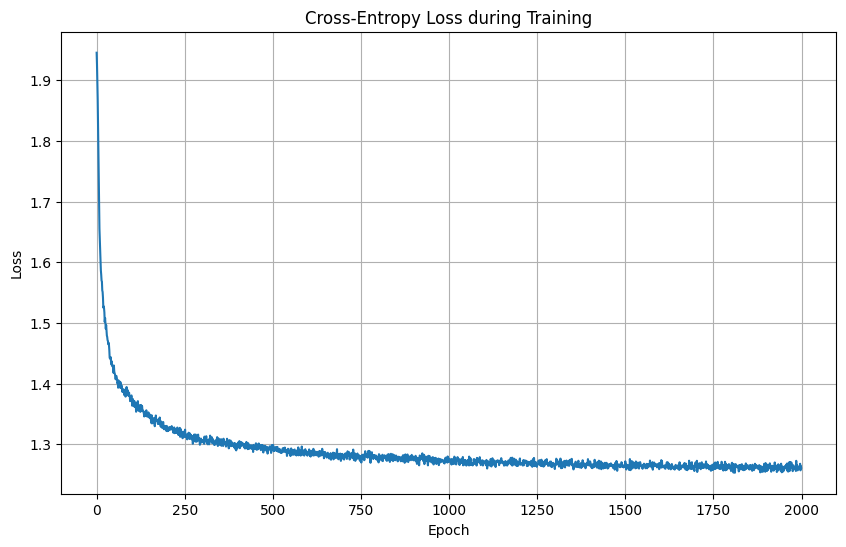

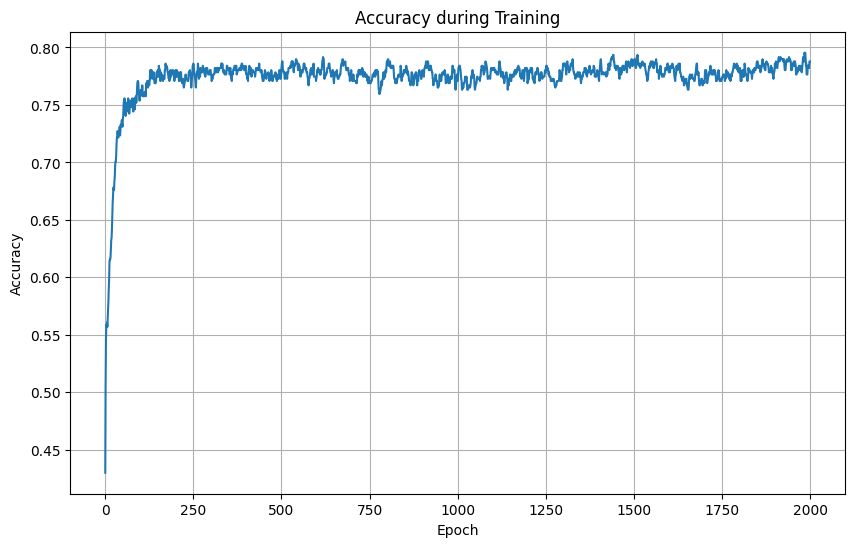

In [ ]:
# train_evaluate_nn(X_train, y_train, X_test, y_test, epochs=2000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lime.lime_tabular import LimeTabularExplainer
import shap

# Dictionary of models with their implementation
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Linear SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
}

In [ ]:
train_and_evaluate_model(X_train, y_train, X_test, y_test, models)


Model: Logistic Regression
Accuracy: 0.5663
Precision (weighted): 0.5507
Recall (weighted): 0.5663

Model: Linear Discriminant Analysis
Accuracy: 0.5852
Precision (weighted): 0.5766
Recall (weighted): 0.5852

Model: Decision Tree
Accuracy: 0.4848
Precision (weighted): 0.4607
Recall (weighted): 0.4848

Model: Linear SVM
Accuracy: 0.5795
Precision (weighted): 0.5758
Recall (weighted): 0.5795

Model: Random Forest
Accuracy: 0.8428
Precision (weighted): 0.8516
Recall (weighted): 0.8428

Model: XGBoost
Accuracy: 0.8068
Precision (weighted): 0.8075
Recall (weighted): 0.8068


In [ ]:
for name, model in models.items():
    print(f"\nNormalized Feature Importance for {name}:")
    if hasattr(model, 'coef_'):
        if model.coef_.ndim > 1:  # For multi-class linear models
            # Sum absolute coefficients across classes
            importance = abs(model.coef_).sum(axis=0)
        else: # For binary linear models
            importance = abs(model.coef_)
        # Normalize the importance values
        normalized_importance = importance / importance.sum()
        feature_importance = pd.Series(normalized_importance, index=X_train.columns).sort_values(ascending=False)
        print(feature_importance)

    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        # Normalize the importance values
        normalized_importance = importance / importance.sum()
        feature_importance = pd.Series(normalized_importance, index=X_train.columns).sort_values(ascending=False)
        print(feature_importance)
    else:
        print("Feature importance not available for this model type.")



Normalized Feature Importance for Logistic Regression:
FHOO      0.164275
Gender    0.157055
CAEC      0.126720
FCVC      0.095487
FAVC      0.076290
CALC      0.074828
SCC       0.069498
TUE       0.046045
FAF       0.044372
NCP       0.043589
MTRANS    0.034812
CH2O      0.028488
SMOKE     0.021767
Age       0.016774
dtype: float64

Normalized Feature Importance for Linear Discriminant Analysis:
FHOO      0.185058
Gender    0.142295
CAEC      0.111996
FCVC      0.093374
SCC       0.085226
FAVC      0.083819
CALC      0.064866
SMOKE     0.058644
NCP       0.051915
CH2O      0.038406
MTRANS    0.026967
FAF       0.025681
TUE       0.022464
Age       0.009290
dtype: float64

Normalized Feature Importance for Decision Tree:
TUE       0.314759
FCVC      0.309297
Age       0.182718
Gender    0.108304
FHOO      0.084922
FAVC      0.000000
NCP       0.000000
CAEC      0.000000
CH2O      0.000000
SMOKE     0.000000
SCC       0.000000
FAF       0.000000
CALC      0.000000
MTRANS    0.000000
d

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Weighted Mean Normalized Feature Importance Across Models (weighted by Accuracy):
FCVC      0.138494
FHOO      0.119697
Gender    0.116524
TUE       0.091373
CAEC      0.089403
Age       0.076166
SCC       0.059500
NCP       0.052267
CALC      0.052143
FAVC      0.051813
CH2O      0.044305
FAF       0.041784
MTRANS    0.039721
SMOKE     0.026810
dtype: float64


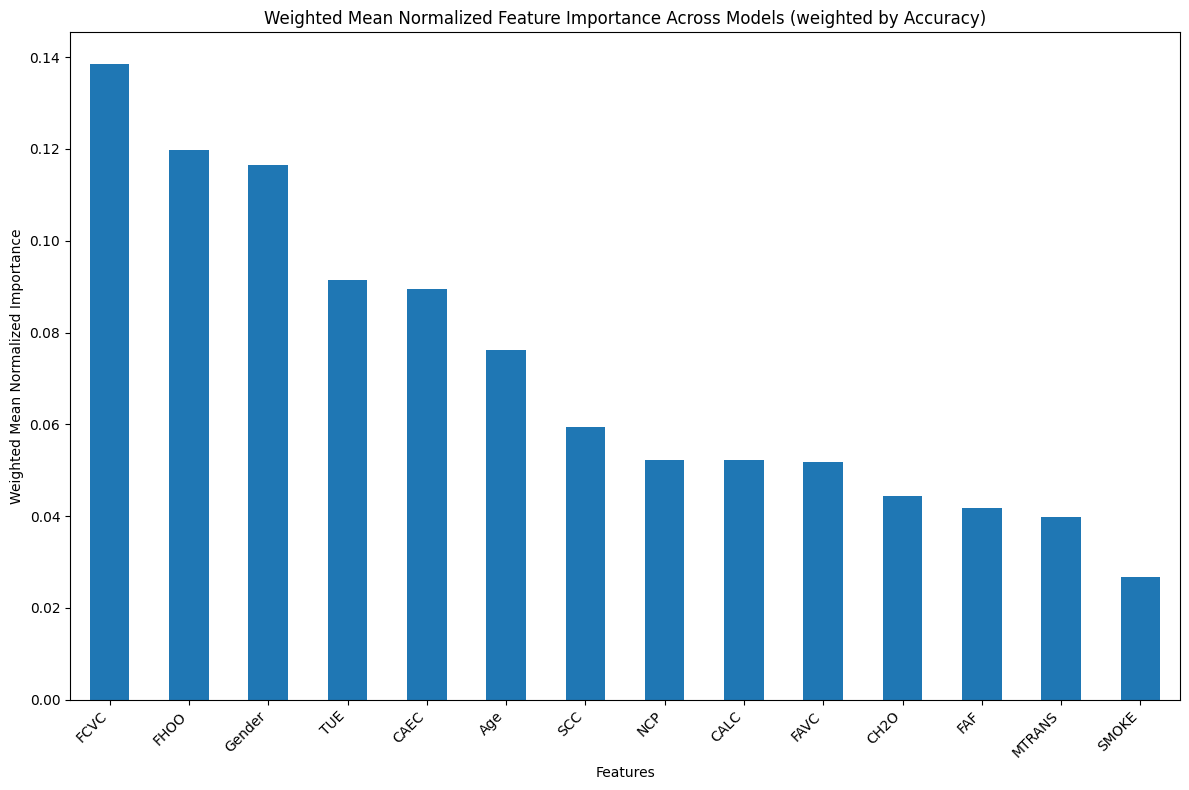

In [ ]:
# prompt: calculate importance (normalized) mean and plot it

importance_data = {}
model_accuracies = {}

for name, model in models.items():
    # Train and evaluate the model to get its accuracy
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

    if hasattr(model, 'coef_'):
        if model.coef_.ndim > 1:
            importance = abs(model.coef_).sum(axis=0)
        else:
            importance = abs(model.coef_)
        normalized_importance = importance / importance.sum()
        importance_data[name] = pd.Series(normalized_importance, index=X_train.columns)
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        normalized_importance = importance / importance.sum()
        importance_data[name] = pd.Series(normalized_importance, index=X_train.columns)

# Combine the importance series into a DataFrame
importance_df = pd.DataFrame(importance_data)

# Calculate the weighted mean importance across models using accuracy as weight
weighted_importance = importance_df.multiply(pd.Series(model_accuracies), axis=1).sum(axis=1) / sum(model_accuracies.values())


print("\nWeighted Mean Normalized Feature Importance Across Models (weighted by Accuracy):")
print(weighted_importance.sort_values(ascending=False))

# Plot the weighted mean importance
plt.figure(figsize=(12, 8))
weighted_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Weighted Mean Normalized Feature Importance Across Models (weighted by Accuracy)')
plt.xlabel('Features')
plt.ylabel('Weighted Mean Normalized Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()